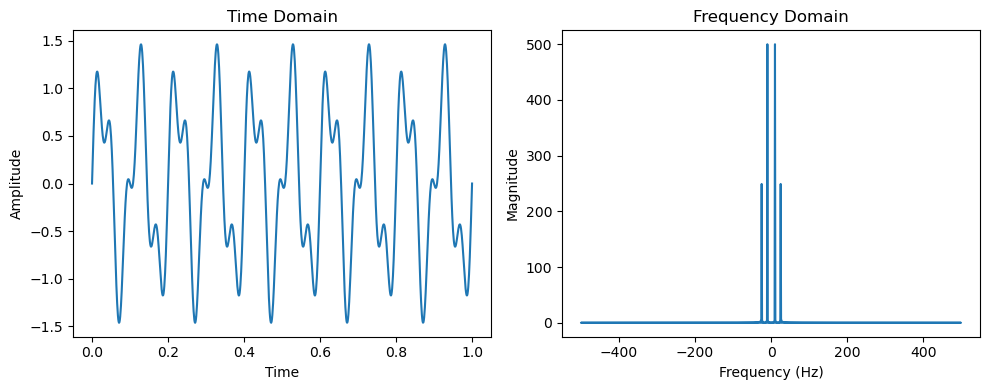

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 시간 변수 생성
t = np.linspace(0, 1, 1000)  # 0부터 1까지의 범위에서 1000개의 시간 점 생성

# 신호 생성
f1 = 10  # 주파수 10Hz
f2 = 25  # 주파수 25Hz
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)  # 10Hz와 25Hz의 주파수 성분을 가진 신호

# FFT 수행
fft_result = np.fft.fft(signal)

# 주파수 계산
sampling_rate = 1 / (t[1] - t[0])  # 샘플링 주파수
frequencies = np.fft.fftfreq(len(signal), 1 / sampling_rate)  # 주파수 벡터 생성

# 결과 그래프 그리기
plt.figure(figsize=(10, 4))

# 시간 도메인 신호 그리기
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Domain')

# 주파수 도메인 신호 그리기
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain')

plt.tight_layout()
plt.show()

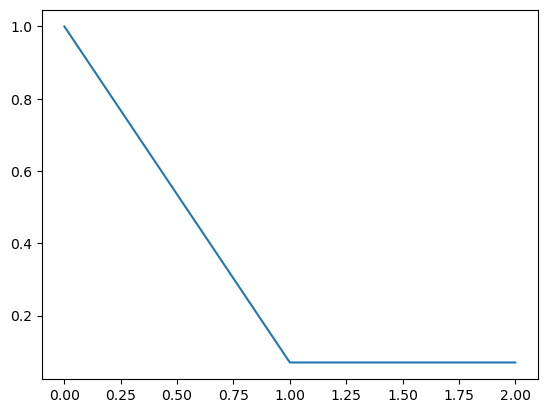

In [6]:
import torch

# 다변량 센서 데이터 생성 (가속도 데이터)
sensor_data = torch.tensor([
    [0.5, 0.3, 0.2],  # x축 가속도
    [0.7, 0.1, 0.4],  # y축 가속도
    [0.9, 0.6, 0.8]   # z축 가속도
])

# 푸리에 변환 수행
fft_result = torch.fft.fft(sensor_data, dim=1)

import matplotlib.pyplot as plt

# 주파수 도메인에서의 주파수 성분 표현
power_spectrum = torch.abs(fft_result) ** 2

# 주파수 성분 그래프 그리기
plt.plot(power_spectrum[0], label='x-axis')  # x


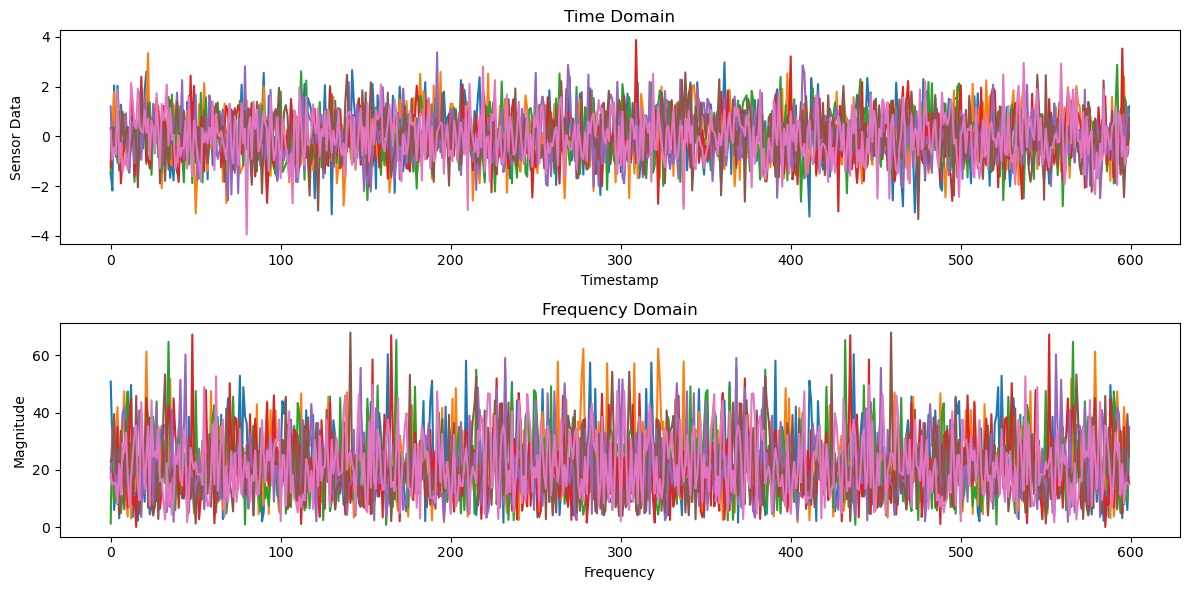

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 입력 데이터 생성
input_data = np.random.randn(600, 7)  # 600개의 타임스탬프와 7개의 멀티 센서 데이터

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(input_data)
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

# 주파수 도메인 변환
freq_data = np.fft.fft(input_data, axis=0)

# 주파수 도메인 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(np.abs(freq_data))
plt.title("Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


In [63]:
from data_preprocessing.dataloader import loading_data
import argparse

parser = argparse.ArgumentParser()

parser.add_argument('--padding', type=str, 
                    default='mean', help='choose one of them : no, max, mean')
parser.add_argument('--timespan', type=int, 
                    default=10000, help='choose of the number of timespan between data points(1000 = 1sec, 60000 = 1min)')
parser.add_argument('--min_seq', type=int, 
                    default=10, help='choose of the minimum number of data points in a example')
parser.add_argument('--min_samples', type=int, default=20, 
                    help='choose of the minimum number of samples in each label')
parser.add_argument('--selected_dataset', default='lapras', type=str,
                    help='Dataset of choice: lapras, casas, opportunity, aras_a, aras_b')
parser.add_argument('--aug_method', type=str, default='AddNoise', help='choose the data augmentation method')
parser.add_argument('--aug_wise', type=str, default='Temporal', help='choose the data augmentation wise')

parser.add_argument('--test_ratio', type=float, default=0.3, help='choose the number of test ratio')

args = parser.parse_args(args=[])

data_type = args.selected_dataset

num_classes, datalist, labellist = loading_data(data_type, args)

print(datalist.shape)



Loading Lapras Dataset--------------------------------------
['Seat Occupy', 'Sound', 'Brightness', 'Light', 'Existence', 'Projector', 'Presentation']
Loading Lapras Dataset Finished--------------------------------------
types_label : [1, 2, 3, 4]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
original label: [1, 2, 3, 4] 
changed label: [1, 2, 3, 4]
Augmentation Starting-------------------
types_label : [1, 2, 3, 4]
count_label : [119, 52, 40, 129]
sum of # episodes: 340
The amount of augmented data: [10, 77, 89, 0]
Before padding-----------------
types_label : [1, 2, 3, 4]
count_label : [258, 258, 258, 258]
sum of # episodes: 1032
mean padding (length): 598
After padding-----------------
types_label : [0, 1, 2, 3]
count_label : [258, 258, 258, 258]
sum of # episodes: 1032
torch.Size([1032, 598, 7])


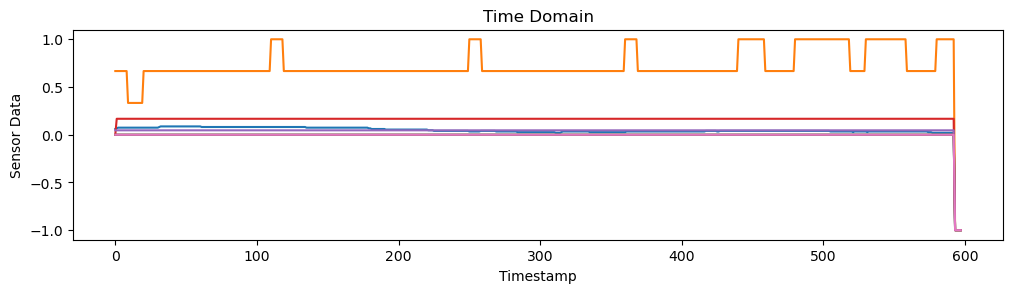

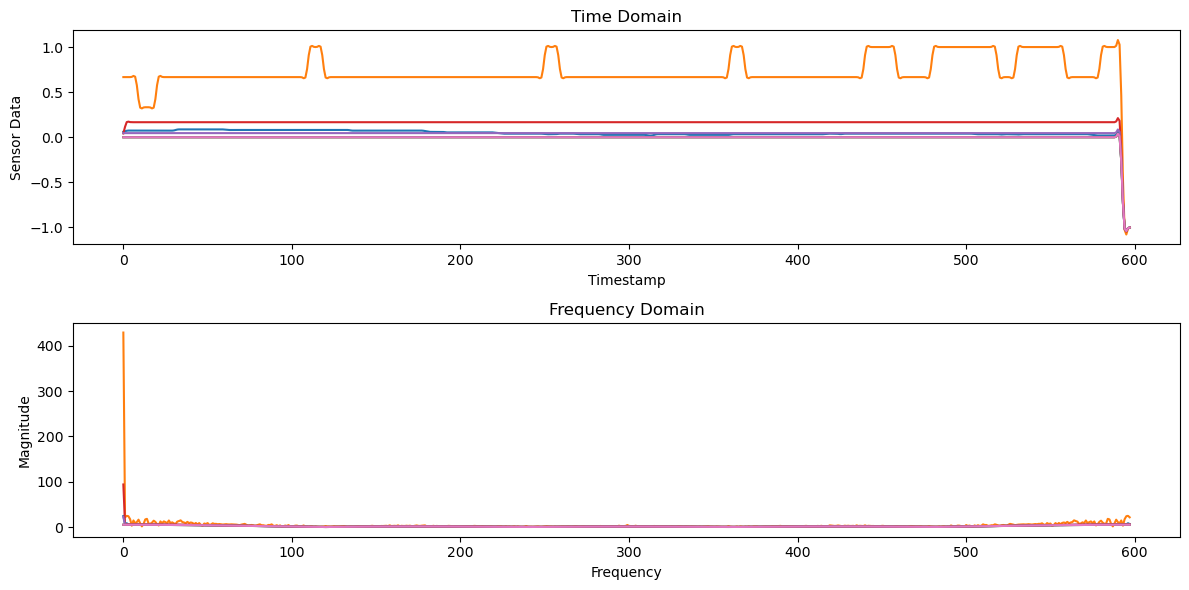

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *

# 입력 데이터 생성
input_data = datalist[200].cpu().numpy()  # 600개의 타임스탬프와 7개의 멀티 센서 데이터

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(input_data)
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")


# Augmentation
# my_aug = (AddNoise(scale=0.05))
my_aug = (Convolve(window="flattop", size=11))
aug = my_aug.augment(np.reshape(input_data,(1, input_data.shape[0], -1)))
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(aug[0])
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")


# 주파수 도메인 변환
freq_data = np.fft.fft(input_data, axis=0)

# 주파수 도메인 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(np.abs(freq_data))
plt.title("Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()
